# Tutorial 1: Data cleaning & visualization 

---

## Introduction

Welcome!, this tutorial will show you how to visualize apples infrared spectroscopy samples using python. From this tutorial you will learn:

 - how to read data into python from an Excel file
 - how to use dataframes (pandas package)
 - how to visualise infrared data
 - how to perform data standardization

For this tutorial, we have three kinds of apples namely Golden Delicious (`GD`), Granny Smith (`GS`), and Royal Gala (`RG`). The general purpose is to use infrared spectrum data to classify between bruised (`B`) sound (`S`) samples.

All tutorials will use `GS` data, while participants have to solve the exercises on the other two data sets.

---

First we import some libraries:

In [9]:
# ___Cell no. 1___

import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import matplotlib.pyplot as plt # This displays graphs once they have been created
import numpy as np # For handling N-DIMENSIONAL ARRAYS

The above statements define the prefixes 'pd' and 'sns' which will be used to identify pandas and seaborn functions respectively in the following code.

---

<b><i> Reading in data </i></b> 

The following code does the following:
- reads data from an Excel file
- converts the Excel file format into a Pandas dataframe 

In [2]:
# ___Cell no. 2___
import os 
df = pd.read_excel(os.path.abspath('../data/Detect-GS.xlsx')) # change the directory as needed

[**hint**](https://www.geeksforgeeks.org/python-os-path-abspath-method-with-example/): since the excel files lives in a sibling directory `../apple_classification/data` we have to use `os.path.abspath` as it returns the absolute path of current working directory with file name `../data/Detect-GD.xlsx`

---

<b><i> Examining data </i></b> 

First let's take a look at the raw infrared data

In [3]:
# ___Cell no. 3___
df.head(5) # shows the first 5 rows of the data frame

,Sample,Condition,Age,Source,11995.49,11991.63,11987.78,11983.92,11980.06,11976.21,...,4034.497,4030.64,4026.783,4022.926,4019.069,4015.211,4011.354,4007.497,4003.64,3999.783
0,GS-ch-bruise1h-10a,B,1h,S1,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,GS-ch-bruise1h-10b,B,1h,S1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115
2,GS-ch-bruise1h-10c,S,1h,S1,-0.139064,-0.138784,-0.138928,-0.138786,-0.138244,-0.137692,...,0.809659,0.808975,0.806819,0.805404,0.807540,0.810868,0.814169,0.812831,0.799328,0.783305
3,GS-ch-bruise1h-10d,S,1h,S1,-0.143663,-0.143526,-0.143718,-0.143459,-0.142628,-0.142030,...,0.682872,0.683971,0.688426,0.692536,0.690982,0.685393,0.679534,0.677676,0.682072,0.689607
4,GS-ch-bruise1h-11a,B,1h,S1,-0.166998,-0.166739,-0.166921,-0.166882,-0.166638,-0.166418,...,0.520031,0.521815,0.520814,0.518175,0.518827,0.523526,0.529133,0.532134,0.531992,0.529879


In the above dataframe, the rows correspond to different apple `GS` samples, while the columns give the values of 2078 variables, which can be explained as follows:
- Sample:
- Condition: Bruised or Sound apple
- Age:
- Source:
- 11995.49,...,3999.783: infrared data

@@@ ask Fred to give you more info here.

In [4]:
# ___Cell no. 4___


df_shape = df.shape # "df_nf.shape" produces a tuple of 2 numbers 
print("the shape of the nonfermented data is "+str(df_shape) ) 

# The individual numbers in the tuple are accessed as follows:
print("where " + str(df_shape[0]) +" is the number of rows, and")
print(str(df_shape[1]) +" is the number of columns")

the shape of the nonfermented data is (503, 2078)
where 503 is the number of rows, and
2078 is the number of columns


This shows that we are working with high dimensional data, one of the major tasks is to reduce the data, this can be done manually using feature engineering methods, or automatically using deep learning. However, given the small amount of data we will be focusing on using feature engineering methods, this will be explored moor in tutorial 2.


**Exercise 1:** Display the first 5 elements and the shape of the two other data sets (GD, RG)
<br>


In [5]:
#  ___ code here ____


---

<b><i> Cleaning data </i></b> 

First, let us change the column names, because wavelength values are more relatable than wavenumbers.

In [6]:
wavenumbers = np.float_(df.columns[4:])
wavelengths = (1/wavenumbers)*10**7 # changing the wavenumber to a wave length
print("\nThis waveNum ("+str(wavenumbers[0])+") should change to this("+ str(wavelengths[0]) + ") waveLength\n")

df.columns.values[4:] = np.round(wavelengths, 3) # getting just up to 3 decimal numbers
df.head(4)


This waveNum (11995.49) should change to this(833.6466455309454) waveLength



,Sample,Condition,Age,Source,833.647,833.915,834.183,834.451,834.72,834.989,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,GS-ch-bruise1h-10a,B,1h,S1,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,GS-ch-bruise1h-10b,B,1h,S1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115
2,GS-ch-bruise1h-10c,S,1h,S1,-0.139064,-0.138784,-0.138928,-0.138786,-0.138244,-0.137692,...,0.809659,0.808975,0.806819,0.805404,0.807540,0.810868,0.814169,0.812831,0.799328,0.783305
3,GS-ch-bruise1h-10d,S,1h,S1,-0.143663,-0.143526,-0.143718,-0.143459,-0.142628,-0.142030,...,0.682872,0.683971,0.688426,0.692536,0.690982,0.685393,0.679534,0.677676,0.682072,0.689607


Now, let us check the frequeny of the apple `GS` condition 

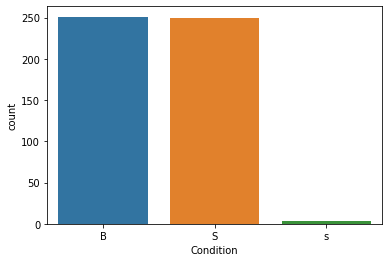

In [7]:
ax = sns.countplot(x="Condition",data=df)

The graph shows that we have three clases of `GS` apples, however this is a mistake, the small `s` for sound needs to be convrted to `S`, so that we can avoide having three classes. 

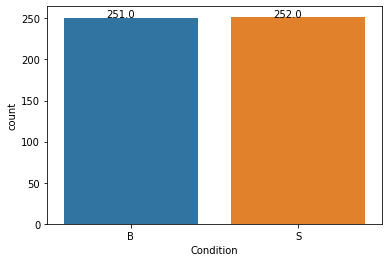

In [11]:
df['Condition'] = df['Condition'].str.upper()
ax = sns.countplot(x="Condition",data=df)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

Now we are done cleaning the data


**Exercise 2:** Clean the other two datasets
<br>